In [1]:
%%HTML
<!-- Mejorar visualización en proyector -->
<style>
.rendered_html {font-size: 1.2em; line-height: 150%;}
div.prompt {min-width: 0ex; padding: 0px;}
.container {width:95% !important;}
</style>

***
# Ayudantía 06
## ACUS099- Procesamiento digital de señales
### 7 de Mayo
#####  Hamming
Profesor: Dr. Victor Poblete R.

Ayudante: Diego Espejo A.
***

### Cortando en Frames: Ventaneo


La transformada discreta de Fourier en tiempo corto (STDFT), se realiza por trozos del audio a analizar, estos trozos normalmentes son traslapados unos con otros para reducir irregularidades en la frontera.

In [2]:
import librosa as lib
import numpy as np
import pandas as pd
from scipy import signal,fftpack
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt

#### Ejemplo Basico

Tenemos un vector de 1 a 10 el cual deseamos realizarle una STDFT, para eso le realizamos un ventaneo con un traslape al 50% lo cual se traduce en lo siguiente

In [3]:
A=np.arange(1,11)
A

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

![texto_alternativo_imagen](Whiteboard.png)

#### Ejemplo con una señal real

##### Ingreso de señal

In [4]:
sig,fs = lib.load('MON_20200109_070000.wav',sr=44100,offset=140,duration=15)

##### Fijar valores para ventaneo

In [5]:
N=2048
tras_percent=0.5
n_tras = int(0.5*N)
n_ventanas = int(np.around(len(sig)/(N-n_tras),0))

##### Zero padding

In [6]:
zero_pad=n_tras*(n_ventanas+1)
sig_pad = np.zeros(zero_pad)
for i in range(len(sig)):
    sig_pad[i]=sig[i]

##### Ventaneo

In [7]:
m = np.zeros((N,n_ventanas))
for i in range(n_ventanas):
    m[:,i]=sig_pad[i*n_tras:N+n_tras*i]

#####  Hamming

In [8]:
hamm = signal.hamming(N)
for j in range(n_ventanas):
    m[:,j]=m[:,j]*hamm

#####  FFT

In [9]:
A = fftpack.fft(m[:,1], N)
freq = np.linspace(0, fs/2, len(A)//2)
response = 2.0/N * np.abs(A[:N//2])

In [13]:
db_response=20*np.log10(response/max(response))

<IPython.core.display.Javascript object>


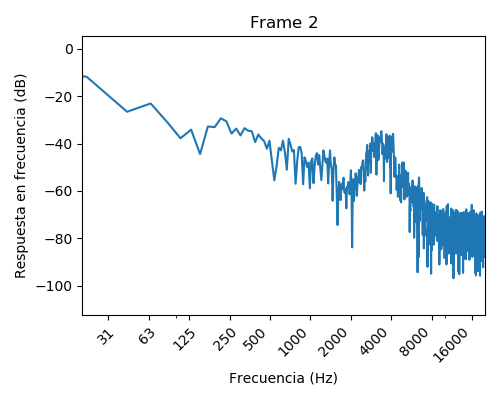

In [20]:
fig,ax = plt.subplots(figsize=(5,4),tight_layout=True)
ax.plot(freq,db_response)
ax.set_title('Frame $2$')
ax.set_ylabel('Respuesta en frecuencia (dB)')
ax.set_xlabel('Frecuencia (Hz)')
ax.set_xlim(20,20000)
ax.set_xscale('symlog')
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
ax.set_xticks([31,63,125,250,500,1000,2000,4000,8000,16000]);
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())